# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
cc_trades = ta.get_coincheck_trades_df()
lq_trades = ta.get_liquid_trades_df()

In [8]:
len(cc_trades), len(lq_trades)

(164, 164)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|            取引回数 |                 164 |
+---------------------+---------------------+
|            開始日時 | 2020-03-18 03:19:25 |
+---------------------+---------------------+
|            終了日時 | 2020-03-18 09:03:36 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.009 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                 800 |
+---------------------+---------------------+

トレード結果
+-------------+----------+
| 開始[JPY]   |    11406 |
+-------------+----------+
| 終了[JPY]   |    11587 |
+-------------+----------+
| 利益[JPY]   |      181 |
+-------------+----------+
| 開始[BTC]   | 0.021948 |
+-------------+----------+
| 終了[BTC]   | 0.021038 |
+-------------+----------+
| 利益[BTC]   | -0.00091 |
+-------------+----------+
| 開始[TOTAL] |  24212.5 |
+-------------+----------+
| 終了[TOTAL] |  23796.4 |


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,cc_side,cc_price,lq_side,lq_price,profit
timestamp,,,,,
2020-03-18 06:53:13,buy,5304.997,sell,5320.017,15.020
2020-03-18 06:53:16,sell,5318.865,buy,5324.372,-5.507
2020-03-18 07:13:20,sell,5275.953,buy,5273.001,2.952
2020-03-18 07:13:27,buy,5281.997,sell,5276.909,-5.088
2020-03-18 07:23:51,sell,5254.962,buy,5254.461,0.501
2020-03-18 07:24:01,buy,5259.999,sell,5260.959,0.960
2020-03-18 07:26:32,sell,5271.487,buy,5270.031,1.456
2020-03-18 07:26:43,buy,5272.997,sell,5272.632,-0.365
2020-03-18 07:34:35,sell,5274.909,buy,5272.947,1.962


In [12]:
round(sum(profit_df.profit), 3)

180.299

## トレードグラフ

In [13]:
cc_ticks = ta.get_coincheck_ticks_df()
lq_ticks = ta.get_liquid_ticks_df()

In [14]:
len(cc_ticks), len(lq_ticks)

(19095, 19095)

In [15]:
cc_bids = cc_ticks['bid']
cc_asks = cc_ticks['ask']
lq_bids = lq_ticks['bid']
lq_asks = lq_ticks['ask']

fig1, ax1 = ta.get_fig(cc_bids, lq_asks)
fig2, ax2 = ta.get_fig(lq_bids, cc_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

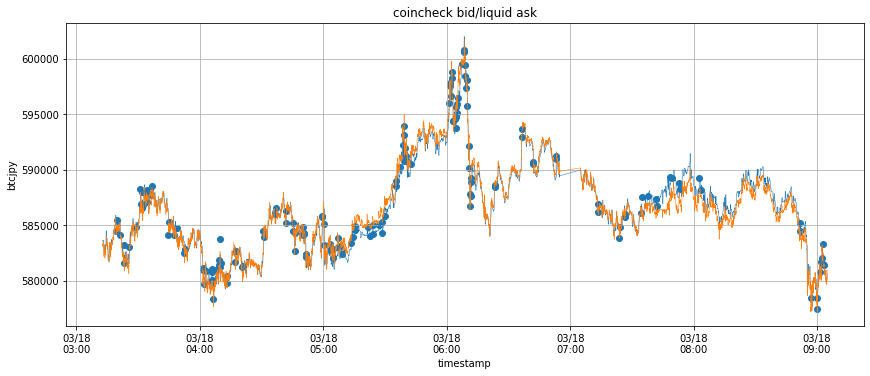

In [16]:
fig1

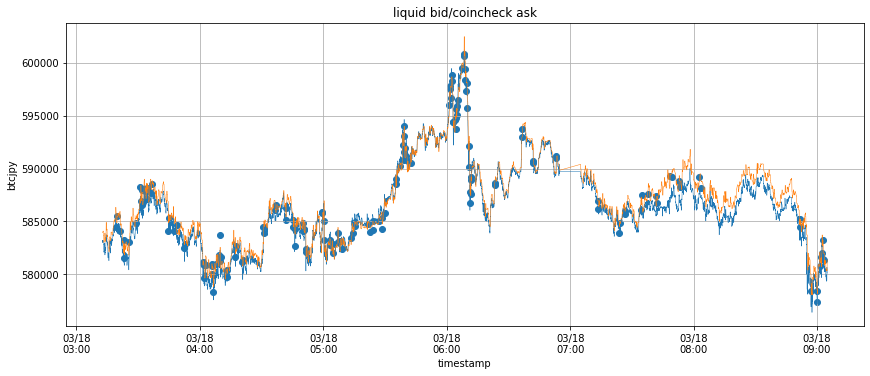

In [17]:
fig2